# Data visualization on Kaggle Dataset:
<br>
<b>Data Source: </b>https://www.kaggle.com/siddharthm1698/coursera-course-dataset

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
coursera = pd.read_csv("coursea_data.csv", index_col=0).sort_index()

In [3]:
coursera.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480k
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310k
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1.5m
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350k


### Course Difficulty Types

Text(0, 0.5, 'Number of courses')

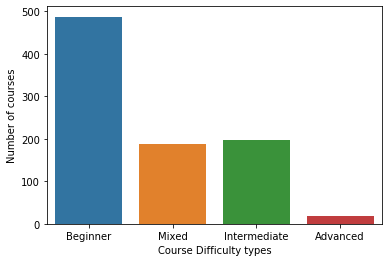

In [4]:
sns.countplot(x='course_difficulty', data=coursera)
plt.xlabel("Course Difficulty types")
plt.ylabel("Number of courses")

There are basically 4 types of courses:
1. Beginner
2. Mixed
3. Intermediate
4. Advanced
<br>

Most courses are of type BEGINNER while least are of type ADVANCED

### Course Organizations

In [5]:
organizations = coursera.groupby(by='course_organization')['course_title'].count().sort_values(ascending=False)

In [6]:
organizations.head()

course_organization
University of Pennsylvania    59
University of Michigan        41
Google Cloud                  34
Duke University               28
Johns Hopkins University      28
Name: course_title, dtype: int64

Maximum number of courses are by university of Pennsylvania i.e. 59

In [7]:
organizations.describe()

count    154.000000
mean       5.785714
std        7.986070
min        1.000000
25%        1.000000
50%        3.000000
75%        6.750000
max       59.000000
Name: course_title, dtype: float64

On an average, there are 5.78 courses by each organization on Coursera <br>
Median = 3 <br>
Thus, 50% organizations have 3 courses <br>

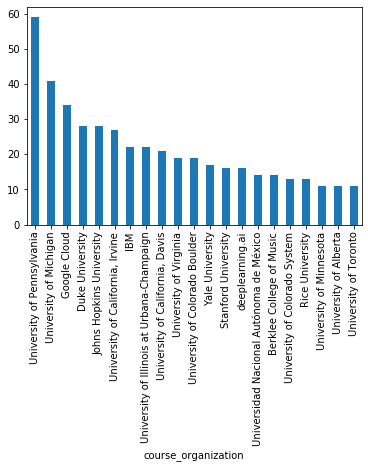

In [49]:
organizations.where(organizations>10).dropna().plot.bar()

### Course Rating description

In [8]:
coursera.describe()['course_rating']

count    891.000000
mean       4.677329
std        0.162225
min        3.300000
25%        4.600000
50%        4.700000
75%        4.800000
max        5.000000
Name: course_rating, dtype: float64

Minimum rating for any course on coursera is 3.3 <br>
Max rating is 5
50% people give rating more than 4.7 to each course which is quite high <br>

### Course Certificate types

In [9]:
np.unique(coursera.course_Certificate_type)

array(['COURSE', 'PROFESSIONAL CERTIFICATE', 'SPECIALIZATION'],
      dtype=object)

Text(0, 0.5, 'Count of certificate')

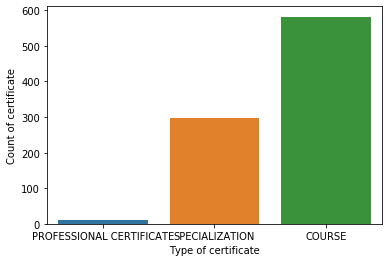

In [10]:
sns.countplot(x='course_Certificate_type', data=coursera)
plt.xlabel("Type of certificate")
plt.ylabel("Count of certificate")

Most of the certificates are of type COURSE <br>
Least give a PROFESSIONAL CERTIFICATE

### Finding course ratings for each course certificate type

In [11]:
coursera.groupby(by='course_Certificate_type')['course_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
course_Certificate_type,,,,,,,,
COURSE,582.0,4.707045,0.151647,3.3,4.6,4.70,4.8,5.0
PROFESSIONAL CERTIFICATE,12.0,4.700000,0.120605,4.6,4.6,4.65,4.8,4.9
SPECIALIZATION,297.0,4.618182,0.167874,3.7,4.5,4.60,4.7,5.0


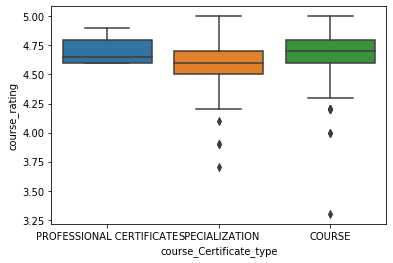

In [12]:
sns.boxplot(x='course_Certificate_type', y='course_rating', data=coursera)

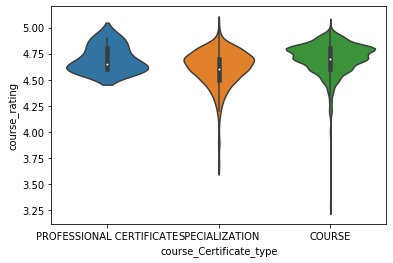

In [13]:
sns.violinplot(x='course_Certificate_type', y='course_rating', data=coursera)

### Finding course ratings for each course difficulty

In [14]:
coursera.groupby(by='course_difficulty')['course_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
course_difficulty,,,,,,,,
Advanced,19.0,4.600000,0.194365,4.2,4.5,4.7,4.75,4.9
Beginner,487.0,4.680903,0.141947,4.1,4.6,4.7,4.80,5.0
Intermediate,198.0,4.646465,0.188939,3.7,4.6,4.7,4.80,5.0
Mixed,187.0,4.708556,0.170803,3.3,4.6,4.8,4.80,4.9


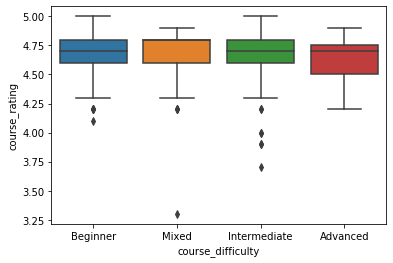

In [15]:
sns.boxplot(x='course_difficulty', y='course_rating', data=coursera)

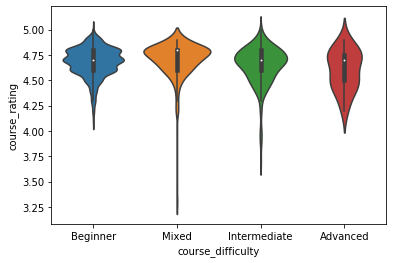

In [16]:
sns.violinplot(x='course_difficulty', y='course_rating', data=coursera)

In [17]:
def convert_to_num(number):
    num = str(number)
    if num.endswith('k'):
        leftover_digits = num[ : (len(num)-1)]
        leftover_digits = float(leftover_digits)
        return(leftover_digits*1000)
    elif num.endswith('m'):
        leftover_digits = num[ : (len(num)-1)]
        leftover_digits = float(leftover_digits)
        return(leftover_digits*1000000)

In [18]:
coursera['enrolled'] = coursera.course_students_enrolled.apply(convert_to_num)

In [19]:
coursera.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,enrolled
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480k,480000.0
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310k,310000.0
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m,2500000.0
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1.5m,1500000.0
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350k,350000.0


In [72]:
coursera['enrolled'].describe().to_frame()

,enrolled
count,8.910000e+02
mean,9.055208e+04
std,1.819365e+05
min,1.500000e+03
25%,1.750000e+04
50%,4.200000e+04
75%,9.950000e+04
max,3.200000e+06


Mean is 90,552 for all the courses <br>
Max is 32 million <br>
max number of courses have 42,000 students

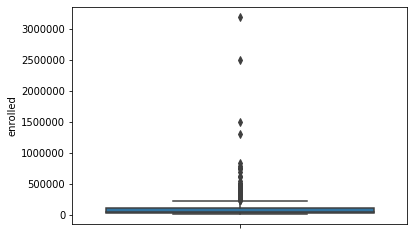

In [21]:
sns.boxplot(y=coursera['enrolled'])

Text(0.5, 1.0, 'Enrolled PDF')

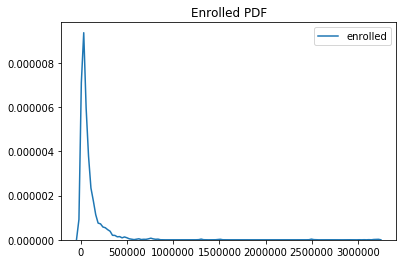

In [22]:
sns.kdeplot(data=coursera['enrolled'])
plt.title("Enrolled PDF")

Value of Enrolled students tapers off sharply after 75th percentile value i.e. approximately around 100,000 students

Text(0.5, 1.0, 'Enrolled CDF')

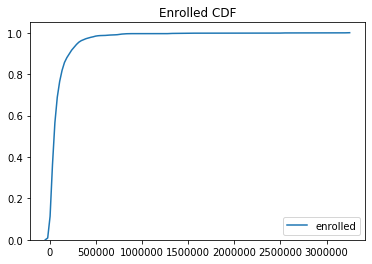

In [23]:
sns.kdeplot(data=coursera.enrolled, cumulative=True)
plt.title("Enrolled CDF")

Most values of enrolled take place before 500,000 

In [24]:
quantiles_enrolled = np.quantile(coursera.enrolled, q=np.arange(0.0,1.01,0.01))

In [25]:
print("Values of quantiles from 70-80 are ")
for i in range(70,101):
    print("{} quantile value is {}".format(i,quantiles_enrolled[i]))

Values of quantiles from 70-80 are 
70 quantile value is 81000.00000000012
71 quantile value is 83899.99999999999
72 quantile value is 86799.99999999996
73 quantile value is 90699.99999999994
74 quantile value is 95600.00000000003
75 quantile value is 99500.0
76 quantile value is 103999.99999999977
77 quantile value is 110000.0
78 quantile value is 110000.0
79 quantile value is 120000.0
80 quantile value is 120000.0
81 quantile value is 130000.0
82 quantile value is 130000.0
83 quantile value is 140000.0
84 quantile value is 140000.0
85 quantile value is 150000.0
86 quantile value is 160000.0
87 quantile value is 170000.0
88 quantile value is 180000.0
89 quantile value is 200000.0
90 quantile value is 220000.0
91 quantile value is 220000.0
92 quantile value is 240000.0
93 quantile value is 267000.00000000047
94 quantile value is 280000.0
95 quantile value is 310000.0
96 quantile value is 323999.99999999977
97 quantile value is 380000.0
98 quantile value is 471999.9999999993
99 quantile

Text(0, 0.5, 'Number of enrolled students')

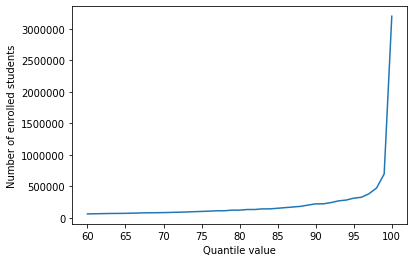

In [26]:
plt.plot(np.arange(60,101), quantiles_enrolled[60:101])
plt.xlabel("Quantile value")
plt.ylabel("Number of enrolled students")

Number of enrolled students increases steadily as quantile value increases <br>
It then increases sharply from 97th-100th quantile value

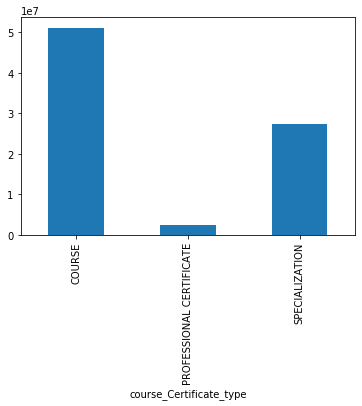

In [27]:
coursera.groupby("course_Certificate_type")['enrolled'].sum().plot.bar()

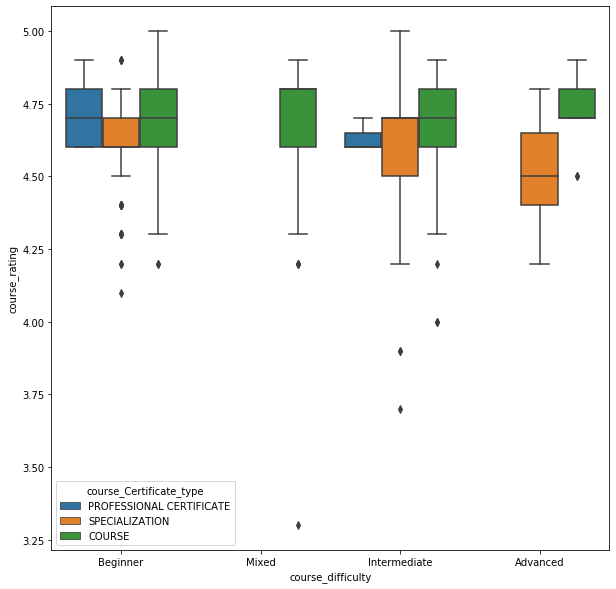

In [28]:
plt.figure(figsize=(10,10))
sns.boxplot(x='course_difficulty', y='course_rating', hue='course_Certificate_type', data=coursera)

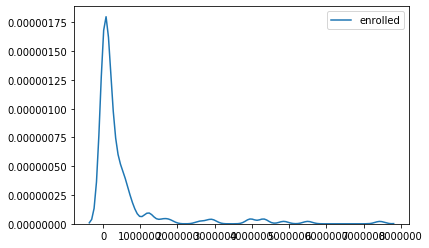

In [41]:
sns.kdeplot(coursera.groupby(by="course_organization")['enrolled'].sum())

In [50]:
coursera.groupby(by="course_organization")['enrolled'].sum().sort_values(ascending=False)

course_organization
University of Michigan                                   7437700.0
University of Pennsylvania                               5501300.0
Stanford University                                      4854000.0
University of California, Irvine                         4326000.0
Johns Hopkins University                                 4298900.0
                                                           ...    
UCL School of Management                                    7800.0
ESCP Business School                                        6500.0
University of New Mexico                                    5500.0
Peter the Great St. Petersburg Polytechnic University       2400.0
Automation Anywhere                                         2200.0
Name: enrolled, Length: 154, dtype: float64

University of Michigan has the highest number of students despite not having the maximum number of courses (University of Penn has 59 while Michigan has 41)

In [42]:
coursera.groupby(by="course_organization")['enrolled'].sum().describe()

count    1.540000e+02
mean     5.239084e+05
std      1.105255e+06
min      2.200000e+03
25%      3.580000e+04
50%      1.575000e+05
75%      4.682000e+05
max      7.437700e+06
Name: enrolled, dtype: float64

On an average, all organizations have 523,908 students
But median value suggests that majority have 157,500 students only

In [53]:
top_10_enrolled = coursera.groupby(by="course_organization")['enrolled'].sum().sort_values(ascending=False).iloc[:10]
top_10_enrolled

course_organization
University of Michigan              7437700.0
University of Pennsylvania          5501300.0
Stanford University                 4854000.0
University of California, Irvine    4326000.0
Johns Hopkins University            4298900.0
Duke University                     3967600.0
Yale University                     3952000.0
IBM                                 2956400.0
deeplearning.ai                     2863400.0
Google Cloud                        2604300.0
Name: enrolled, dtype: float64

List of top 10 enrolled course organizations

In [56]:

(coursera.groupby(by="course_organization")['enrolled'].sum().sum() - top_10_enrolled.sum())/coursera.groupby(by="course_organization")['enrolled'].sum().sum()

0.46999760788974976

Top 10 course organizations account for almost 47% of all the students on Coursera